In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm

In [27]:
writer = SummaryWriter("torchlogs/")

In [31]:
transform = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [32]:
path_test = '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'
path_train_and_val = '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'

ds_test = datasets.ImageFolder(path_test, transform=transform)
ds_train_and_val = datasets.ImageFolder(path_train_and_val, transform=transform)

In [33]:
dataset_size = len(ds_train_and_val)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size

ds_train, ds_val = random_split(ds_train_and_val, [train_size, val_size])

In [34]:
print(f'Train dataset size is {len(ds_train)}')
print(f'Validation dataset size is {len(ds_val)}')
print(f'Test dataset size is {len(ds_test)}')

Train dataset size is 6515
Validation dataset size is 1629
Test dataset size is 8041


In [35]:
train_loader = DataLoader(ds_train, batch_size=16, shuffle=True)
val_loader = DataLoader(ds_val, shuffle=False)
test_loader = DataLoader(ds_test, shuffle=False)

In [37]:
num_classes = len(ds_test.classes)
num_classes

196

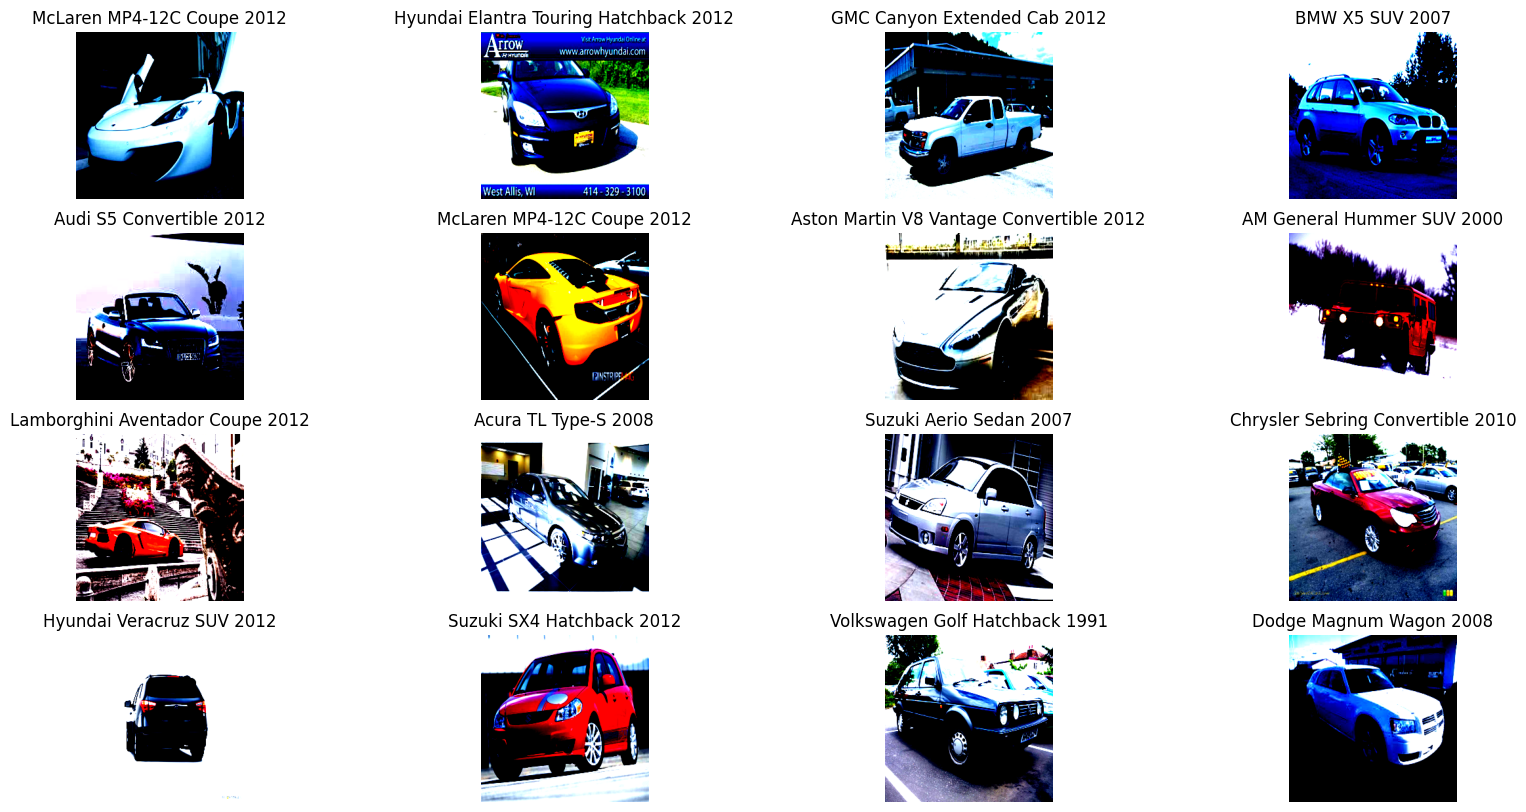

In [41]:
def imshow(img, title=None):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.axis('off') # ici denormalise pour bien display

images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(20, 10))
for idx in range(len(images)):
    ax = fig.add_subplot(4, 4, idx+1, xticks=[], yticks=[]) 
    imshow(images[idx])
    ax.set_title(ds_train_and_val.classes[labels[idx]])

plt.show()

In [43]:
model = models.resnet18(pretrained=True)

In [44]:
num_ftrs = model.fc.in_features
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [45]:
# num_epochs = 5
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     for i, (inputs, labels) in enumerate(data_loader):
#         inputs, labels = inputs.to(device), labels.to(device)

#         optimizer.zero_grad()

#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#         writer.add_scalar('Training Loss', running_loss / (i + 1), epoch * len(data_loader) + i)
#         writer.add_scalar('Accuracy', 100. * correct / total, epoch * len(data_loader) + i)

#     print(f'Fin de l\'époque {epoch+1}, Perte moyenne: {running_loss / len(data_loader):.4f}, Total Accuracy: {100 * correct / total:.2f}%')
#     writer.add_scalar('Epoch Training Loss', running_loss / len(data_loader), epoch)
#     writer.add_scalar('Epoch Accuracy', 100. * correct / total, epoch)

# writer.close()

NameError: name 'data_loader' is not defined